In [1]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from stop_words import get_stop_words
from time import time
import gensim
import pyLDAvis.gensim
import csv
import re
import pandas
import sys
import numpy as np
reload(sys)

sys.setdefaultencoding("ISO-8859-2")


tokenizer = TweetTokenizer()

# create English stop words list
en_stop = get_stop_words('en')
en_stop.append('AT_USER')
en_stop.append('URL')

# create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

#start process_tweet
def processTweet(tweet):
    #process the tweets

    #converts to lower case
    tweet = tweet.lower()
    #converts www.* or https?://* to URL
    tweet = re.sub('((www\.[\s]+)|(https?://[^\s]+))', 'URL', tweet)
    #converts @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER', tweet)
    #remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet
#end



In [2]:
def getFeatureVector(tweet):
    featureVector = []
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if it consists of only words
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*[a-zA-Z]+[a-zA-z0-9]*$", w)
        #stem token
        #stemmed_tokens = [p_stemmer.stem(w) for w in words]
        #ignore if it is a stopWord
        if( w in en_stop or val is None):
            continue
        else:
            p_stemmer.stem(w) 
            featureVector.append(w.lower())
    return featureVector
#end

In [3]:
def fullPreprocess(tweet):
    return getFeatureVector(processTweet(tweet))

In [4]:
import pandas as pd

df = pd.read_csv("new_leeds_tweets.csv", index_col=None, header=0)
df["row_count"]= df.index
df

,Id,UserId,User-screen_name,Latitude,Longitude,Place-full_name,Created_at,Text,Year,Month,Day,Hour,Minute,Second,row_count
0,6.730000e+17,7.153097e+07,"""thedjangos""",53.806154,-1.557230,"""Leeds_ England""","""Fri Dec 04 14:27:23 +0000 2015""","""https://t.co/rH62p8QeWE""",2015,12,4,14,27,23,0
1,6.730000e+17,1.945451e+07,"""deepakmahtani""",53.794466,-1.548192,"""Leeds_ England""","""Fri Dec 04 14:31:41 +0000 2015""","""To keele via leeds! (@ Leeds Railway Station...",2015,12,4,14,31,41,1
2,6.730000e+17,5.073909e+08,"""SamJamesDenby""",53.806674,-1.554070,"""Leeds_ England""","""Fri Dec 04 14:34:40 +0000 2015""","""_ô__ô_ @ University of Leeds https://t.co/...",2015,12,4,14,34,40,2
3,6.730000e+17,2.866582e+09,"""patternsmade""",53.882782,-1.264183,"""Tadcaster_ England""","""Fri Dec 04 14:35:24 +0000 2015""","""So tired. Woke up so early for James Corden ...",2015,12,4,14,35,24,3
4,6.730000e+17,2.866582e+09,"""patternsmade""",53.882806,-1.264157,"""Tadcaster_ England""","""Fri Dec 04 14:35:48 +0000 2015""","""Of course_ it was worth the early start. Obv...",2015,12,4,14,35,48,4
5,6.730000e+17,2.763761e+09,"""TheWhiteBulb""",53.820998,-1.517507,"""Leeds_ England""","""Fri Dec 04 14:36:16 +0000 2015""","""A beautiful set of flower letters from a few...",2015,12,4,14,36,16,5
6,6.730000e+17,1.590981e+08,"""LeedsMarkets""",53.797871,-1.538181,"""Leeds_ England""","""Fri Dec 04 14:36:27 +0000 2015""","""Visit Leeds Kirkgate Market tomorrow and see...",2015,12,4,14,36,27,6
7,6.730000e+17,1.471944e+09,"""DavidWoodhead26""",53.803149,-1.647885,"""Leeds_ England""","""Fri Dec 04 14:49:39 +0000 2015""","""@GCSMidlands @bisgovuk @CanalRiverTrust Is t...",2015,12,4,14,49,39,7
8,6.730000e+17,8.267826e+07,"""ginaaaaw""",53.869372,-1.660237,"""Guiseley_ England""","""Fri Dec 04 14:56:25 +0000 2015""","""@Kimberhaes @dEUSbe @PXLMusic omg""",2015,12,4,14,56,25,8
9,6.730000e+17,4.653464e+08,"""syairazizainul""",53.810393,-1.556752,"""Leeds_ England""","""Fri Dec 04 14:57:10 +0000 2015""","""I'm at Houldsworth Building in Leeds_ West Y...",2015,12,4,14,57,10,9


In [5]:
#df["bow_tweets"] = df["Text"].apply(lambda x: fullPreprocess(x))
#df1 = df["bow_tweets"]
#df1["row_count"]= df1.index
#df1

In [7]:
df["User-screen_name"] = df["User-screen_name"].str.replace('"','')

In [8]:
# "Fri Dec 04 14:27:23 +0000 2015"
#df["Created_at"] = pd.to_datetime(df.Created_at, format="")

In [9]:
# list for tokenized documents in loop


#Read the tweets one by one and process it
inpTweets = csv.reader(open('Tweets_text.csv' , 'rb'), delimiter=',', quotechar='"')
count = 0;
featureList = []
for row in inpTweets: 
    tweet = row[0]
    processedTweet = processTweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    featureList.append(featureVector)

In [10]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(featureList)

    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(f) for f in featureList]

In [11]:
photography_Sights = ['photo', 'brick','view','park','square','garden','high','snow','sky','Hyde','tower', 
                           'posted','hill','river', 'water', 'waterfront','selfie','willow','sky','sunset','photos_',
                           'park_']
  
optimism_Kindness_positivity = ['good','well','great','luck','nice','done','fella','looks','yep','fun','inlove',
                                'brilliant','love','life','hope','like','god']

leisure_Attractions = ['art','museum','albeit','theatre','arts','fashion','gallery','british','history','design',
                       'studio','hall','beer','craft','launch', 'david','opera','tattoo','prince',
                       'halloween','space','ale','natural','wintersun','leedsliverpoolcanal','sanctuary','concert',
                       'broadway','festival','pool']

tv_Film = ['watch','jag','och','seen','watching','film','best','movie','saw','episode','cinema','bbc','eastenders',
           'star','itv','story','star','batman','joker','monk','starwars','dawsons','video','vids', 'callthemidwife']

humour_Informal_conversations = ['lol','said','haha','mate','fine','yeah','omg','alright','sorry','okay','though', 'thought',
                                 'true','funny','btw','meant','told','maybe','just','clare','clarence','louisa', 'james',
                                 'alsarawi','cute','link','lovinleeds','much','friends','family','awesome','cheers','fantastic',
                                 'excellent', 'never','bit','yes']

transport_travel = ['train','turning','rides','flying','trip','car','driving','junction','road','junction_','lane','metro',
                    'board','traffic','southbound','directions','street','transits','circuits','visits','east','west','minor',
                    'moving', 'medium','gyratory','ring','slow','fast','northbound','eastbound','bus','inbound','miles','near',
                    'travelling','airport','mph']

politics_Beliefs_current_Affairs = ['law','women','lord','must','tax','many','country','selfagree','vote','labour','liberty',
                                    'yorkfloods','world','unesco','sovereign','flood','floodaware','warning_','warning-floods'
                                    'flooding','news','international','mm','temperature','barometer','hpa_','humidity','clouds','wars',
                                    'rain','wind']

sports_games = ['team','game','season','fans','league','won','chance','fifa','players','stadium','games','goals','beat','lose','fan',
                'rugby','league','challenge','cup','lufc','peptalk','final','fourth','live','last','first','academy','win','one','riasa',
                'club','manager','zero','three']

anticipation_socialising = ['next','week','back','till','weekend','comes','july','date','year','month','saturday','monday','friday','weeks',
                            'december','november','week','january','tomorrow','latest','tuesdays','sunday','wednesday','thursday']

business_Information_Network = ['business','jobs','event','local','staff','web','data','social','job','talk','interesting','agent','department','earned',
                                'engineering','money','professionally','hiring','dennison','career','acr','o2jobs','skilled','trade','mechanical',
                                'engineer']

pessimism_Negativity = ['don','cry','hazardous','trouble','disgusting','sick','solitude']

music_Musicians = ['mix','gig','show','sound','tunes','tune','concert','songs','album','musictrack','capitalfm','tunes','soul','listening',
                   'gigs','songs','tidal','muse','remix','stereophonics']

routine_Activities = ['bedtime','day','work','sleep','today','night','early','hour','late','asleep','ago','already','since','left','fall',
                      'school', 'rest','first','tired','run','running','living','walk','working','nap','sat','chilling','breaks','skipping',
                      'teaching','pouting','queuing','training','busy','time','gym','get','morning','health','see','going','go', 'still','meet',
                      'join','got','commend','walking','can','meet','meeting','idea','seeing','endomondo','said','took','putting','help','afternoon',
                      'now','come','went','feel','need','yet','falling','session','end','lights','appeared','thing','service','paint','post','wear',
                      'wearing','put','see','cut']

food_drink = ['food','cheese','coffee','taste','lunch','dinner','egg','tea','breakfast','gin','chickenpizza','yum','rice','burger','salad','yummy',
              'cream','fish','orange','eat','ale','alcohol','pubcrawl','brew','wine','oats','vegan','menu','peppermint','tea','mocha','fruity','pepper',
              'herbal','spices','lasagna','pub','food','fizzy','tasty','drinking','lunchtime','hot','cold','lunch','dinner','meal','half']

body_Appearance_clothes = ['hair','like','suit','head','clothes','shoes','white','hat','eyes','smell','short','dress','sweater','ears','red','old','strong',
                           'beautiful','nice','green','new','long','young','black','super','endorphins','box','hand','arms','dark']

social_Media_Apps = ['x-box','text','phone','store','read','iphone','twitter','email','add','send','check','wifi','help','online','account','instagram',
                         'fix','talk','ps4','lumia930','broadband','myspace','trdnl','hashtag','oracle','call','trending','trends']

slang_profanities = ['girl','fam','man','girls','mum','smh','swear','dad','real','idk','lil','bugger','knob','brats','omg','xx','douchebags','threesome',
                     'aaw','cock','fuck','mad','boy','people','dog','fucking','lady','cat','gonna']

place_checkins = ['railway','city','station','leeds','leedscitystation','sheffield','yorkshire','house','building','york','wortley','armley','city',
                  'flat','block','glasgow','birmingham','warehouse','huddersfield','topshop','park','tesco','armouries','theroyalarmouries','asda','church',
                  'otley','leeds_','place','headingley','library','laidlaw','headingley_','farsley','rawdon','dawsons','elland','trinity','centre','horsforth',
                  'tadcaster','beckett','university','uni','home','wharf','harrogate','manor','boston','eu','wetherby_','ilkley_','pudsey','restaurant','pub',
                  'yorkpubs','arena','bradford','london','ilkley','hall','centre_','brudnell','belgrave','bar']

wishes_Gratitude = ['thank','baby','please','little','miss','love','thanks','beautiful','much','babes','follow','pls','birthday','merry','tnx']

season= ['Christmas','xmas','prezzies','winter2016','tolookalotlikechristmas']

In [12]:
photography_Sights_keys = [key for key, word in dictionary.items() if word in photography_Sights]
print(len(photography_Sights),len(photography_Sights_keys))
optimism_Kindness_positivity_keys = [key for key, word in dictionary.items() if word in optimism_Kindness_positivity]
print(len(optimism_Kindness_positivity),len(optimism_Kindness_positivity_keys))
leisure_Attractions_keys = [key for key, word in dictionary.items() if word in leisure_Attractions]
print(len(leisure_Attractions),len(leisure_Attractions_keys))
tv_Film_keys = [key for key, word in dictionary.items() if word in tv_Film]
print(len(tv_Film),len(tv_Film_keys))
humour_Informal_conversations_keys= [key for key, word in dictionary.items() if word in humour_Informal_conversations]
print(len(humour_Informal_conversations),len(humour_Informal_conversations_keys))
transport_travel_keys= [key for key, word in dictionary.items() if word in transport_travel ]
print(len(transport_travel ),len(transport_travel_keys))
politics_Beliefs_current_Affairs_keys= [key for key, word in dictionary.items() if word in politics_Beliefs_current_Affairs ]
print(len(politics_Beliefs_current_Affairs),len(politics_Beliefs_current_Affairs_keys))
sports_games_keys= [key for key, word in dictionary.items() if word in sports_games]
print(len(sports_games),len(sports_games_keys))
anticipation_socialising_keys= [key for key, word in dictionary.items() if word in anticipation_socialising]
print(len(anticipation_socialising),len(anticipation_socialising_keys))
business_Information_Network_keys= [key for key, word in dictionary.items() if word in business_Information_Network]
print(len(business_Information_Network),len(business_Information_Network_keys))
pessimism_Negativity_keys= [key for key, word in dictionary.items() if word in pessimism_Negativity]
print(len(pessimism_Negativity),len(pessimism_Negativity_keys))
music_Musicians_keys= [key for key, word in dictionary.items() if word in music_Musicians]
print(len(music_Musicians),len(music_Musicians_keys))
routine_Activities_keys= [key for key, word in dictionary.items() if word in routine_Activities]
print(len(routine_Activities),len(routine_Activities_keys))
food_drink_keys= [key for key, word in dictionary.items() if word in food_drink ]
print(len(food_drink),len(food_drink_keys))
body_Appearance_clothes_keys= [key for key, word in dictionary.items() if word in body_Appearance_clothes]
print(len(body_Appearance_clothes),len(body_Appearance_clothes_keys))
social_Media_Apps_keys= [key for key, word in dictionary.items() if word in social_Media_Apps]
print(len(social_Media_Apps),len(social_Media_Apps_keys))
slang_profanities_keys= [key for key, word in dictionary.items() if word in slang_profanities]
print(len(slang_profanities),len(slang_profanities_keys))
place_checkins_keys= [key for key, word in dictionary.items() if word in place_checkins]
print(len(place_checkins),len(place_checkins_keys))  
wishes_Gratitude_keys= [key for key, word in dictionary.items() if word in wishes_Gratitude]
print(len(wishes_Gratitude),len(wishes_Gratitude_keys))                    
season_keys= [key for key, word in dictionary.items() if word in season ]
print(len(season),len(season_keys))

In [13]:
num_topics =20

In [14]:

etaprior = np.zeros(shape=(num_topics, len(dictionary)), dtype=float)
etaprior.fill(1./num_topics)

overweight_value = 100.

for i in photography_Sights_keys:
    etaprior[0,i] = overweight_value
for i in optimism_Kindness_positivity_keys:
    etaprior[1,i] = overweight_value
for i in leisure_Attractions_keys:
    etaprior[2,i] = overweight_value
for i in tv_Film_keys:
    etaprior[3,i] = overweight_value
for i in humour_Informal_conversations_keys:
    etaprior[4,i] = overweight_value
for i in transport_travel_keys:
    etaprior[5,i] = overweight_value
for i in politics_Beliefs_current_Affairs_keys:
    etaprior[6,i] = overweight_value
for i in sports_games_keys:
    etaprior[7,i] = overweight_value
for i in anticipation_socialising_keys:
    etaprior[8,i] = overweight_value
for i in business_Information_Network_keys:
    etaprior[9,i] = overweight_value
for i in pessimism_Negativity_keys:
    etaprior[10,i] = overweight_value
for i in music_Musicians_keys:
    etaprior[11,i] = overweight_value
for i in routine_Activities_keys:
    etaprior[12,i] = overweight_value
for i in food_drink_keys:
    etaprior[13,i] = overweight_value
for i in body_Appearance_clothes_keys:
    etaprior[14,i] = overweight_value
for i in social_Media_Apps_keys:
    etaprior[15,i] = overweight_value
for i in slang_profanities_keys:
    etaprior[16,i] = overweight_value
for i in place_checkins_keys:
    etaprior[17,i] = overweight_value
for i in wishes_Gratitude_keys:
    etaprior[18,i] = overweight_value
for i in season_keys:
    etaprior[19,i] = overweight_value



In [15]:
column_sums = etaprior.sum(axis=0, keepdims=True)
etaprior = etaprior/column_sums
print(etaprior)
print(etaprior[0, photography_Sights_keys[0]])

In [23]:
alphaprior = np.zeros((1,num_topics), dtype=float)
alphaprior.fill(1./num_topics)
alphaprior = np.asarray([10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10], dtype=float)
alphaprior /= alphaprior.sum()
alphaprior

array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
        0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
        0.05,  0.05])

In [17]:
import numpy as np
#arr = np.array(array)
df["bow_tweets"] = np.array(df["Text"].apply(lambda x: fullPreprocess(x)))
#df1= df["bow_tweets"]
#df1["row_count"]= df1.index
df.bow_tweets

#df["bow_tweets"] = np.array(df["Text"].apply(lambda x: fullPreprocess(x)))
#df1 = df["bow_tweets"]
#df1["row_count"]= df1.index
#df1

0                                                       []
1        [keele, via, leeds, railway, station, leeds_, ...
2                                      [university, leeds]
3        [tired, woke, early, james, corden, early_, st...
4        [course_, worth, early, start, obviously, loui...
5        [beautiful, set, flower, letters, weeks, back,...
6        [visit, leeds, kirkgate, market, tomorrow, see...
7        [north, voted, mayor, hmg, forcing, one, us, u...
8                                                    [omg]
9         [houldsworth, building, leeds_, west, yorkshire]
10                                  [chillin, airport, yo]
11          [publicised, nov, booked, fast, sorry, missed]
12       [minor, slow, traffic, stanningley, pudsey, da...
13          [corn, exchange, leeds, leeds, corn, exchange]
14       [sunshine, day_, makes, crazy, happy, happy, n...
15       [top, night, soba, leeds, saturday, bar, soba,...
16       [leeds, today, donbroco, looking, fresh, tour,.

In [18]:
type("bow_tweets")

str

In [19]:
df["bow_tweets"].dtype

dtype('O')

In [20]:
# generate LDA model
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=150, id2word = dictionary, passes=1)
starttime = time()
%time ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word=dictionary, distributed=False, chunksize=2000, passes=90, update_every=1, alpha=alphaprior, eta=etaprior, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01)
#ldamodel.print_topics(40)
endtime = time()
print("Run took {0} s".format(endtime-starttime))
Leeds_data =  pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(Leeds_data)

In [178]:
from pprint import pprint
topic_names = ["photography_Sights","optimism_Kindness_positivity","leisure_Attractions","tv_Film","humour_Informal_conversations","transport_travel","politics_Beliefs_current_Affairs", "sport_games", "anticipation_socialising","business_Information_Network", "pessimism_Negativity", "music_Musicians", "routine_Activities", "food_drink","body_Appearance_clothes","social_Media_Apps", "slang_profanities","place_checkins", "wishes_Gratitude", "season"]
topics_words = list(zip(topic_names, ldamodel.print_topics(num_topics, num_words=10)))
pprint(topics_words)

In [179]:
for i in range(10):
    print df.loc[i, "bow_tweets"]
    print type(df.loc[i, "bow_tweets"])

In [180]:
tweets_by_topic = [(row_count, ldamodel[dictionary.doc2bow(df.bow_tweets[row_count])]) for row_count in range(df.shape[0])]



In [181]:
dflist = []
for i in tweets_by_topic:
    dfdict = {}
    dfdict["tweet_no"] = i[0]
    dfdict["topic0"] = np.nan
    dfdict["topic1"] = np.nan
    dfdict["topic2"] = np.nan
    dfdict["topic3"] = np.nan
    dfdict["topic4"] = np.nan
    dfdict["topic5"] = np.nan
    dfdict["topic6"] = np.nan
    dfdict["topic7"] = np.nan
    dfdict["topic8"] = np.nan
    dfdict["topic9"] = np.nan
    dfdict["topic10"] = np.nan
    dfdict["topic11"] = np.nan
    dfdict["topic12"] = np.nan
    dfdict["topic13"] = np.nan
    dfdict["topic14"] = np.nan
    dfdict["topic15"] = np.nan
    dfdict["topic16"] = np.nan
    dfdict["topic17"] = np.nan
    dfdict["topic18"] = np.nan
    dfdict["topic19"] = np.nan
    dfdict["tweets"] = df.Text[i[0]]
    
    for j in i[1]:
        if j[0] == 0:
            dfdict["topic0"] = j[1]
        if j[0] == 1:
            dfdict["topic1"] = j[1]
        if j[0] == 2:
            dfdict["topic2"] = j[1]
        if j[0] == 3:
            dfdict["topic3"] = j[1]
        if j[0] == 4:
            dfdict["topic4"] = j[1]
        if j[0] == 5:
            dfdict["topic5"] = j[1]
        if j[0] == 6:
            dfdict["topic6"] = j[1]
        if j[0] == 7:
            dfdict["topic7"] = j[1]
        if j[0] == 8:
            dfdict["topic8"] = j[1]
        if j[0] == 9:
            dfdict["topic9"] = j[1]
        if j[0] == 10:
            dfdict["topic10"] = j[1]
        if j[0] == 11:
            dfdict["topic11"] = j[1]
        if j[0] == 12:
            dfdict["topic12"] = j[1]
        if j[0] == 13:
            dfdict["topic13"] = j[1]
        if j[0] == 14:
            dfdict["topic14"] = j[1]
        if j[0] == 15:
            dfdict["topic15"] = j[1]
        if j[0] == 16:
            dfdict["topic16"] = j[1]
        if j[0] == 17:
            dfdict["topic17"] = j[1]
        if j[0] == 18:
            dfdict["topic18"] = j[1]
        if j[0] == 19:
            dfdict["topic19"] = j[1]   
    dflist.append(dfdict)

tweet_by_topic_df = pd.DataFrame(dflist)

In [182]:
df1.dtype

dtype('O')

In [183]:
tweetgeo_df = pd.merge(left=tweet_by_topic_df, right=df, left_index="tweet_no", right_index="row_count", how='inner')

In [184]:
tweetgeo_df.head()


,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,...,Created_at,Text,Year,Month,Day,Hour,Minute,Second,row_count,bow_tweets
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,"""Fri Dec 04 14:27:23 +0000 2015""","""https://t.co/rH62p8QeWE""",2015,12,4,14,27,23,0,[]
1,0.586320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"""Fri Dec 04 14:31:41 +0000 2015""","""To keele via leeds! (@ Leeds Railway Station...",2015,12,4,14,31,41,1,"[keele, via, leeds, railway, station, leeds_, ..."
2,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,"""Fri Dec 04 14:34:40 +0000 2015""","""_ô__ô_ @ University of Leeds https://t.co/...",2015,12,4,14,34,40,2,"[university, leeds]"
3,NaN,0.128830,0.164027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"""Fri Dec 04 14:35:24 +0000 2015""","""So tired. Woke up so early for James Corden ...",2015,12,4,14,35,24,3,"[tired, woke, early, james, corden, early_, st..."
4,NaN,0.256250,NaN,0.131250,NaN,NaN,NaN,NaN,0.381250,NaN,...,"""Fri Dec 04 14:35:48 +0000 2015""","""Of course_ it was worth the early start. Obv...",2015,12,4,14,35,48,4,"[course_, worth, early, start, obviously, loui..."


In [185]:
tweetgeo_df.columns

Index([u'topic0', u'topic1', u'topic10', u'topic11', u'topic12', u'topic13',
       u'topic14', u'topic15', u'topic16', u'topic17', u'topic18', u'topic19',
       u'topic2', u'topic3', u'topic4', u'topic5', u'topic6', u'topic7',
       u'topic8', u'topic9', u'tweet_no', u'tweets', u'Id', u'UserId',
       u'User-screen_name', u'Latitude', u'Longitude', u'Place-full_name',
       u'Created_at', u'Text', u'Year', u'Month', u'Day', u'Hour', u'Minute',
       u'Second', u'row_count', u'bow_tweets'],
      dtype='object')

In [186]:
bymonth_df = tweetgeo_df.groupby("Month").mean().reset_index()
#bymonth_df = tweetgeo_df.groupby("Month").mean()
bymonth_df.head()

,Month,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,Id,UserId,Latitude,Longitude,Year,Day,Hour,Minute,Second,row_count
0,1,0.101333,0.117286,0.116426,0.101774,0.091031,0.105231,0.118695,0.094300,0.084641,...,6.888753e+17,8.539082e+08,53.808718,-1.544962,2016.0,17.358927,14.845131,29.703559,28.932134,15306.0
1,2,0.099993,0.117699,0.118721,0.095766,0.090634,0.105385,0.119467,0.093620,0.094309,...,6.995056e+17,3.958945e+14,53.807808,-1.557039,2016.0,15.735427,14.921900,29.884058,29.539936,28021.5
2,3,0.100291,0.103316,0.100080,0.085319,0.084493,0.096736,0.104450,0.082110,0.091523,...,7.098877e+17,8.576351e+16,53.809613,-1.560339,2016.0,15.393526,14.342422,29.430342,30.002843,41090.0
3,4,0.108095,0.109642,0.114377,0.097787,0.087862,0.111355,0.122050,0.093233,0.106372,...,7.214706e+17,3.468497e+15,53.808563,-1.560008,2016.0,16.412426,14.200547,29.903976,29.947055,53067.0
4,5,0.099184,0.114765,0.106364,0.101412,0.090552,0.112755,0.117365,0.093560,0.093013,...,7.282790e+17,2.555022e+15,53.806709,-1.565052,2016.0,5.032677,14.427919,29.421672,30.253003,60266.5


In [187]:
bymonth_df.columns

Index([u'Month', u'topic0', u'topic1', u'topic10', u'topic11', u'topic12',
       u'topic13', u'topic14', u'topic15', u'topic16', u'topic17', u'topic18',
       u'topic19', u'topic2', u'topic3', u'topic4', u'topic5', u'topic6',
       u'topic7', u'topic8', u'topic9', u'tweet_no', u'Id', u'UserId',
       u'Latitude', u'Longitude', u'Year', u'Day', u'Hour', u'Minute',
       u'Second', u'row_count'],
      dtype='object')

In [188]:
bymonth_df1 = bymonth_df.drop([u'tweet_no', u'Id', u'UserId',
       u'Latitude', u'Longitude', u'Year', u'Day', u'Hour', u'Minute',
       u'Second', u'row_count'], axis=1)
bymonth_df1.head()

,Month,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,topic18,topic19,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,1,0.101333,0.117286,0.116426,0.101774,0.091031,0.105231,0.118695,0.094300,0.084641,...,0.087520,0.145891,0.094964,0.102312,0.093818,0.149354,0.136438,0.101746,0.105094,0.104374
1,2,0.099993,0.117699,0.118721,0.095766,0.090634,0.105385,0.119467,0.093620,0.094309,...,0.089926,0.161448,0.102138,0.108559,0.087140,0.131983,0.141916,0.098827,0.114414,0.103849
2,3,0.100291,0.103316,0.100080,0.085319,0.084493,0.096736,0.104450,0.082110,0.091523,...,0.084300,0.233417,0.087330,0.091044,0.082429,0.101609,0.122059,0.093722,0.101356,0.093834
3,4,0.108095,0.109642,0.114377,0.097787,0.087862,0.111355,0.122050,0.093233,0.106372,...,0.095896,0.155077,0.102496,0.113193,0.090597,0.096274,0.137364,0.103571,0.130126,0.106524
4,5,0.099184,0.114765,0.106364,0.101412,0.090552,0.112755,0.117365,0.093560,0.093013,...,0.083384,0.155484,0.098300,0.104968,0.084127,0.062809,0.124177,0.102973,0.120993,0.103950


In [189]:
bymonth_df1.columns

Index([u'Month', u'topic0', u'topic1', u'topic10', u'topic11', u'topic12',
       u'topic13', u'topic14', u'topic15', u'topic16', u'topic17', u'topic18',
       u'topic19', u'topic2', u'topic3', u'topic4', u'topic5', u'topic6',
       u'topic7', u'topic8', u'topic9'],
      dtype='object')

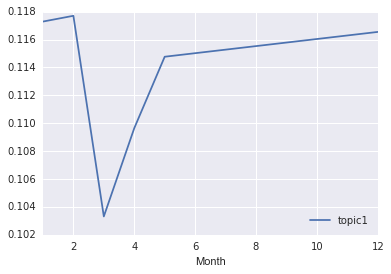

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

starttime = time()
bymonth_df.plot(x='Month', y='topic1')
plt.show()
endtime = time()
print("Run took {0} s".format(endtime-starttime))

In [191]:
tweet_sort = tweetgeo_df.sort(columns = 'Hour', ascending = True)

In [192]:
byhour_df = tweetgeo_df.groupby("Hour").mean()


In [193]:
byhour_df.head()

,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,...,Id,UserId,Latitude,Longitude,Year,Month,Day,Minute,Second,row_count
Hour,,,,,,,,,,,,,,,,,,,,,
0,0.077047,0.083829,0.135662,0.089811,0.086366,0.090020,0.111665,0.100736,0.139918,0.072535,...,6.977197e+17,3.590027e+16,53.809587,-1.548635,2015.821204,4.017071,16.102426,26.959569,29.973944,26433.498652
1,0.061197,0.105126,0.104311,0.082724,0.057110,0.093581,0.111238,0.084684,0.187741,0.071640,...,6.980272e+17,6.497923e+16,53.805138,-1.551113,2015.814696,4.156550,15.217252,27.845048,30.127796,26936.883387
2,0.075674,0.092248,0.088377,0.071698,0.073499,0.075396,0.099895,0.083345,0.209991,0.080702,...,6.996636e+17,9.994393e+16,53.801675,-1.549276,2015.820093,4.254673,14.637850,31.282710,30.922897,28662.273364
3,0.079126,0.086070,0.089554,0.064904,0.075376,0.080332,0.086290,0.079831,0.275211,0.057171,...,7.006629e+17,1.191501e+17,53.801083,-1.550661,2015.852691,3.957507,14.558074,32.611898,30.756374,29809.541076
4,0.074947,0.086866,0.108174,0.075296,0.075475,0.053352,0.064421,0.091909,0.259885,0.077544,...,7.025307e+17,1.312331e+17,53.805232,-1.546880,2015.855828,4.073620,15.012270,33.677914,27.147239,31905.733129


In [194]:
byhour_df.columns

Index([u'topic0', u'topic1', u'topic10', u'topic11', u'topic12', u'topic13',
       u'topic14', u'topic15', u'topic16', u'topic17', u'topic18', u'topic19',
       u'topic2', u'topic3', u'topic4', u'topic5', u'topic6', u'topic7',
       u'topic8', u'topic9', u'tweet_no', u'Id', u'UserId', u'Latitude',
       u'Longitude', u'Year', u'Month', u'Day', u'Minute', u'Second',
       u'row_count'],
      dtype='object')

In [195]:
byhour_df1 = byhour_df.drop([u'tweet_no', u'Id', u'UserId',
       u'Latitude', u'Longitude', u'Year', u'Month', u'Day', u'Minute',
       u'Second', u'row_count'], axis = 1)

In [196]:
byhour_df1.head()

,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
Hour,,,,,,,,,,,,,,,,,,,,
0,0.077047,0.083829,0.135662,0.089811,0.086366,0.090020,0.111665,0.100736,0.139918,0.072535,0.089843,0.201270,0.093156,0.151501,0.077047,0.054502,0.101573,0.102074,0.084699,0.094082
1,0.061197,0.105126,0.104311,0.082724,0.057110,0.093581,0.111238,0.084684,0.187741,0.071640,0.076169,0.249223,0.084913,0.183713,0.115238,0.053253,0.090440,0.079649,0.078814,0.106950
2,0.075674,0.092248,0.088377,0.071698,0.073499,0.075396,0.099895,0.083345,0.209991,0.080702,0.082952,0.286250,0.079972,0.261131,0.072426,0.051372,0.091982,0.059881,0.072756,0.074509
3,0.079126,0.086070,0.089554,0.064904,0.075376,0.080332,0.086290,0.079831,0.275211,0.057171,0.072001,0.321609,0.085408,0.288412,0.061742,0.043195,0.082601,0.073105,0.047779,0.084103
4,0.074947,0.086866,0.108174,0.075296,0.075475,0.053352,0.064421,0.091909,0.259885,0.077544,0.079503,0.325761,0.069664,0.309004,0.047667,0.057322,0.104687,0.077219,0.059138,0.097838


In [197]:
byhour_df2= byhour_df1.transpose()
byhour_df2.index.name = 'Topics'
byhour_df2

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Topics,,,,,,,,,,,,,,,,,,,,,
topic0,0.077047,0.061197,0.075674,0.079126,0.074947,0.080197,0.118796,0.147096,0.129633,0.130117,...,0.116071,0.111841,0.104573,0.093835,0.086515,0.075831,0.076715,0.080869,0.084823,0.077968
topic1,0.083829,0.105126,0.092248,0.086070,0.086866,0.107174,0.126896,0.125270,0.134424,0.126885,...,0.101003,0.109906,0.112702,0.107286,0.107734,0.110953,0.121521,0.115045,0.103785,0.112525
topic10,0.135662,0.104311,0.088377,0.089554,0.108174,0.109882,0.114507,0.121897,0.123062,0.135793,...,0.109846,0.114021,0.102187,0.111000,0.111221,0.101778,0.106639,0.112146,0.122755,0.122250
topic11,0.089811,0.082724,0.071698,0.064904,0.075296,0.088426,0.111775,0.094532,0.099760,0.106224,...,0.093447,0.096592,0.097418,0.090560,0.090583,0.090417,0.091114,0.095231,0.101122,0.091776
topic12,0.086366,0.057110,0.073499,0.075376,0.075475,0.086659,0.084503,0.090533,0.107247,0.096999,...,0.084466,0.086680,0.083563,0.083159,0.084833,0.085702,0.084549,0.082357,0.084737,0.088164
topic13,0.090020,0.093581,0.075396,0.080332,0.053352,0.077597,0.107014,0.109852,0.098977,0.104219,...,0.113826,0.110386,0.110051,0.110489,0.115852,0.114023,0.101537,0.086051,0.092035,0.087977
topic14,0.111665,0.111238,0.099895,0.086290,0.064421,0.094424,0.122737,0.119232,0.131416,0.130603,...,0.110846,0.109457,0.105071,0.109978,0.116354,0.119089,0.111550,0.114381,0.119140,0.124733
topic15,0.100736,0.084684,0.083345,0.079831,0.091909,0.126846,0.120960,0.118767,0.099053,0.112924,...,0.093600,0.094462,0.093883,0.087771,0.087008,0.086741,0.081132,0.093703,0.087173,0.086855
topic16,0.139918,0.187741,0.209991,0.275211,0.259885,0.237146,0.189486,0.136858,0.116012,0.090669,...,0.079160,0.089446,0.100812,0.073115,0.077202,0.065778,0.069152,0.073573,0.080623,0.094746


In [198]:
byhour_df2.columns.name

'Hour'

In [199]:
byhour_df2.index.name = 'Topics'

In [200]:
row_tweets = ["photography_Sights","optimism_Kindness_positivity","leisure_Attractions","tv_Film",
              "humour_Informal_conversations","transport_travel","politics_Beliefs_current_Affairs", 
              "sport_games", "anticipation_socialising","business_Information_Network", "pessimism_Negativity", 
              "music_Musicians", "routine_Activities", "food_drink","body_Appearance_clothes","social_Media_Apps",
              "slang_profanities","place_checkins", "wishes_Gratitude", "season"]


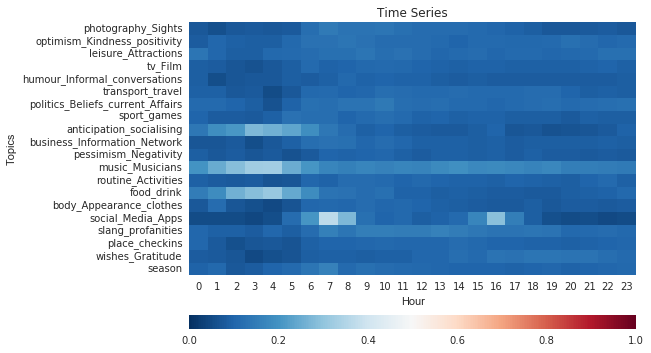

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

data =byhour_df2

yticks = data.index
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = data.columns
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2,gridspec_kw=grid_kws)
ax = sns.heatmap(data, yticklabels= row_tweets, xticklabels= True, ax=ax, cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"}
                 ,cmap="RdBu_r", vmin=0, vmax=1 )
 
ax.set_title('Time Series')
plt.show()

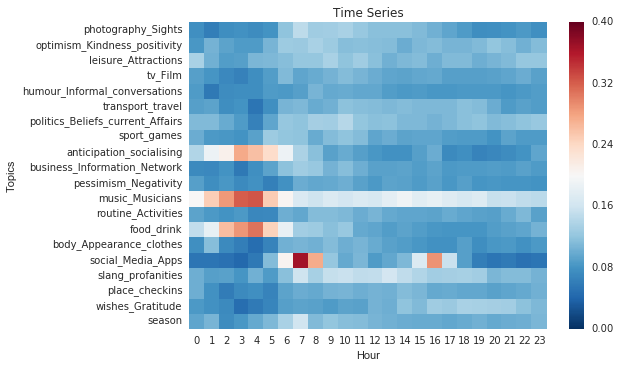

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

data =byhour_df2

yticks = data.index
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks

xticks = data.columns
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks

ax = sns.heatmap(data, yticklabels= row_tweets, xticklabels= True,cmap="RdBu_r", vmin=0, vmax=0.4 )
ax.set_title('Time Series')
plt.show()

In [203]:
import pandas as pd

df_acorn = pd.read_csv("Matched.csv", index_col=None, header=0)
#df_acorn["row_count"]= df.index
df_acorn.head(5)

,Output_code,Longitude,Latitude,Postcode,Acorn_category,Acorn_group,Acorn_type
0,E00169811,-1.549350,53.796665,LS12HA,6.0,R,62.0
1,E00169782,-1.551003,53.798252,LS12LF,6.0,R,61.0
2,E00169782,-1.552373,53.799362,LS12RA,6.0,R,62.0
3,E00169780,-1.553281,53.801075,LS13BR,6.0,R,60.0
4,E00169782,-1.551743,53.801445,LS13EX,6.0,R,60.0


In [204]:
tweetacorn_df = pd.merge(left=df_acorn, right=tweetgeo_df, left_index=["Latitude","Longitude"], right_index=["Latitude","Longitude"], how='inner')

In [205]:
tweetacorn_df.head(5)

,Output_code,Longitude_x,Latitude_x,Postcode,Acorn_category,Acorn_group,Acorn_type,topic0,topic1,topic10,...,Created_at,Text,Year,Month,Day,Hour,Minute,Second,row_count,bow_tweets
0,E00169811,-1.549350,53.796665,LS12HA,6.0,R,62.0,0.050000,0.050000,0.050000,...,"""Fri Dec 04 14:27:23 +0000 2015""","""https://t.co/rH62p8QeWE""",2015,12,4,14,27,23,0,[]
1,E00169782,-1.551003,53.798252,LS12LF,6.0,R,61.0,0.586320,NaN,NaN,...,"""Fri Dec 04 14:31:41 +0000 2015""","""To keele via leeds! (@ Leeds Railway Station...",2015,12,4,14,31,41,1,"[keele, via, leeds, railway, station, leeds_, ..."
2,E00169782,-1.552373,53.799362,LS12RA,6.0,R,62.0,0.016667,0.016667,0.016667,...,"""Fri Dec 04 14:34:40 +0000 2015""","""_ô__ô_ @ University of Leeds https://t.co/...",2015,12,4,14,34,40,2,"[university, leeds]"
3,E00169780,-1.553281,53.801075,LS13BR,6.0,R,60.0,NaN,0.128830,0.164027,...,"""Fri Dec 04 14:35:24 +0000 2015""","""So tired. Woke up so early for James Corden ...",2015,12,4,14,35,24,3,"[tired, woke, early, james, corden, early_, st..."
4,E00169782,-1.551743,53.801445,LS13EX,6.0,R,60.0,NaN,0.256250,NaN,...,"""Fri Dec 04 14:35:48 +0000 2015""","""Of course_ it was worth the early start. Obv...",2015,12,4,14,35,48,4,"[course_, worth, early, start, obviously, loui..."


In [206]:
tweet_sort1 = tweetacorn_df.sort(columns = 'Acorn_category', ascending = True)

In [207]:
tweet_sort1.head(5)

,Output_code,Longitude_x,Latitude_x,Postcode,Acorn_category,Acorn_group,Acorn_type,topic0,topic1,topic10,...,Created_at,Text,Year,Month,Day,Hour,Minute,Second,row_count,bow_tweets
17888,E00053937,-1.825544,53.921246,LS299TZ,1.0,B,7.0,NaN,0.116667,0.450000,...,"""Sat Jan 23 12:59:22 +0000 2016""","""The second half kicks off and both teams Loo...",2016,1,23,12,59,22,17888,"[second, half, kicks, teams, look, sharp, earl..."
14130,E00058031,-1.530603,53.841408,LS176QQ,1.0,B,7.0,NaN,NaN,NaN,...,"""Fri Jan 15 13:01:52 +0000 2016""","""I just began a running workout using #Endomo...",2016,1,15,13,1,52,14130,"[just, began, running, workout, using, endomon..."
14131,E00058032,-1.526053,53.839203,LS176QR,1.0,C,11.0,NaN,NaN,NaN,...,"""Fri Jan 15 13:01:58 +0000 2016""","""öŤö_öö_ö_ö˘ GMS (@ University of Leed...",2016,1,15,13,1,58,14131,"[gms, university, leeds, leeds_, west]"
14132,E00058032,-1.526154,53.841057,LS176QS,1.0,C,11.0,0.22372,0.355778,0.107818,...,"""Fri Jan 15 13:02:20 +0000 2016""","""Leeds Train Station HYPE!! Much needed weeke...",2016,1,15,13,2,20,14132,"[leeds, train, station, much, needed, weekend,..."
14133,E00058016,-1.534713,53.843506,LS176QU,1.0,B,7.0,NaN,NaN,0.227778,...,"""Fri Jan 15 13:03:48 +0000 2016""","""@jeremyloops bringing a bit of South Africa ...",2016,1,15,13,3,48,14133,"[bringing, bit, south, africa, last, night, th..."


In [208]:
bycategory_df1= tweet_sort1

In [209]:
bycategory_df2 = bycategory_df1.groupby("Acorn_category").mean()

In [210]:
bycategory_df2

,Longitude_x,Latitude_x,Acorn_type,topic0,topic1,topic10,topic11,topic12,topic13,topic14,...,UserId,Latitude_y,Longitude_y,Year,Month,Day,Hour,Minute,Second,row_count
Acorn_category,,,,,,,,,,,,,,,,,,,,,
1.0,-1.555953,53.857322,7.651510,0.099387,0.119045,0.113457,0.100233,0.090345,0.106399,0.116625,...,8.029855e+08,53.808843,-1.545619,2016.000000,1.000000,16.719005,14.873357,29.863233,29.138011,15073.5
2.0,-1.569600,53.816824,18.041785,0.112903,0.119751,0.133468,0.103061,0.091784,0.107225,0.131094,...,9.105720e+08,53.808519,-1.535197,2016.000000,1.000000,10.245014,14.819563,30.695157,28.848053,11732.0
3.0,-1.555100,53.814546,28.261372,0.099585,0.113123,0.128336,0.101766,0.092108,0.106648,0.110099,...,9.337583e+08,53.813242,-1.549179,2015.604423,5.351345,13.671023,14.364664,29.360895,28.536064,9216.0
4.0,-1.547467,53.810482,41.276841,0.108562,0.128679,0.137272,0.099799,0.080998,0.118513,0.113291,...,7.160259e+08,53.808358,-1.555759,2015.000000,12.000000,18.798377,14.485331,29.075843,28.456305,5624.5
5.0,-1.552987,53.799306,54.449591,0.099396,0.114397,0.115307,0.102861,0.083196,0.115087,0.140969,...,7.945510e+08,53.811844,-1.552595,2015.000000,12.000000,12.040666,14.713923,29.674103,29.293985,2252.0
6.0,-1.548151,53.817428,61.674274,0.088371,0.090326,0.092678,0.102837,0.063599,0.111498,0.135257,...,7.950928e+08,53.813991,-1.551541,2015.000000,12.000000,7.178423,15.348548,30.614108,28.939834,240.5


In [211]:
bycategory_df2.columns

Index([u'Longitude_x', u'Latitude_x', u'Acorn_type', u'topic0', u'topic1',
       u'topic10', u'topic11', u'topic12', u'topic13', u'topic14', u'topic15',
       u'topic16', u'topic17', u'topic18', u'topic19', u'topic2', u'topic3',
       u'topic4', u'topic5', u'topic6', u'topic7', u'topic8', u'topic9',
       u'tweet_no', u'Id', u'UserId', u'Latitude_y', u'Longitude_y', u'Year',
       u'Month', u'Day', u'Hour', u'Minute', u'Second', u'row_count'],
      dtype='object')

In [212]:
bycategory_df3 = bycategory_df2.drop([u'Longitude_x', u'Latitude_x', u'Acorn_type',u'tweet_no', u'Id', u'UserId',
       u'Latitude_y', u'Longitude_y', u'Year', u'Month', u'Day', u'Minute',u'Hour',
       u'Second', u'row_count'], axis = 1)

In [213]:
bycategory_df3

,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
Acorn_category,,,,,,,,,,,,,,,,,,,,
1.0,0.099387,0.119045,0.113457,0.100233,0.090345,0.106399,0.116625,0.094072,0.081667,0.102765,0.082873,0.153110,0.094490,0.096859,0.106283,0.157658,0.138679,0.098306,0.096841,0.100347
2.0,0.112903,0.119751,0.133468,0.103061,0.091784,0.107225,0.131094,0.091093,0.062823,0.077366,0.079989,0.159135,0.095606,0.107036,0.069667,0.100027,0.115887,0.096767,0.104037,0.103047
3.0,0.099585,0.113123,0.128336,0.101766,0.092108,0.106648,0.110099,0.131638,0.099585,0.099773,0.094970,0.128744,0.110738,0.112074,0.078744,0.158688,0.122794,0.101444,0.108047,0.135453
4.0,0.108562,0.128679,0.137272,0.099799,0.080998,0.118513,0.113291,0.100003,0.097616,0.102350,0.082124,0.159390,0.110370,0.107695,0.092143,0.209835,0.138272,0.104825,0.161387,0.117783
5.0,0.099396,0.114397,0.115307,0.102861,0.083196,0.115087,0.140969,0.121251,0.114397,0.108262,0.080211,0.156984,0.102602,0.119260,0.099455,0.195012,0.128656,0.099195,0.116607,0.129657
6.0,0.088371,0.090326,0.092678,0.102837,0.063599,0.111498,0.135257,0.114529,0.109014,0.086274,0.088923,0.177724,0.120522,0.079208,0.095460,0.218116,0.139598,0.095658,0.083514,0.099791


In [214]:
bycategory_df4= bycategory_df3.transpose()
bycategory_df4.index.name = 'Topics'


In [215]:
bycategory_df4.head(5)

Acorn_category,1.0,2.0,3.0,4.0,5.0,6.0
Topics,,,,,,
topic0,0.099387,0.112903,0.099585,0.108562,0.099396,0.088371
topic1,0.119045,0.119751,0.113123,0.128679,0.114397,0.090326
topic10,0.113457,0.133468,0.128336,0.137272,0.115307,0.092678
topic11,0.100233,0.103061,0.101766,0.099799,0.102861,0.102837
topic12,0.090345,0.091784,0.092108,0.080998,0.083196,0.063599


In [216]:
bycategory_df4.columns.name

'Acorn_category'

In [217]:
bycategory_df4.index.name = 'Topics'

In [218]:
row_tweets = ["photography_Sights","optimism_Kindness_positivity","leisure_Attractions","tv_Film",
              "humour_Informal_conversations","transport_travel","politics_Beliefs_current_Affairs", 
              "sport_games", "anticipation_socialising","business_Information_Network", "pessimism_Negativity", 
              "music_Musicians", "routine_Activities", "food_drink","body_Appearance_clothes","social_Media_Apps",
              "slang_profanities","place_checkins", "wishes_Gratitude", "season"]

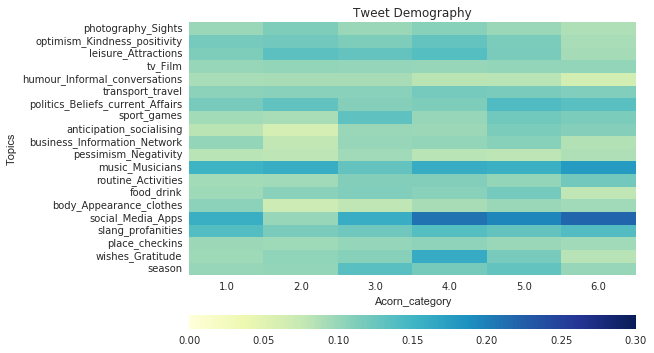

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
data =bycategory_df4

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(data, yticklabels= row_tweets, cmap="YlGnBu", xticklabels= True, ax=ax, cbar_ax=cbar_ax, 
                 cbar_kws={"orientation": "horizontal"}, vmin=0, vmax=0.3 )
ax.set_title('Tweet Demography')
plt.show()

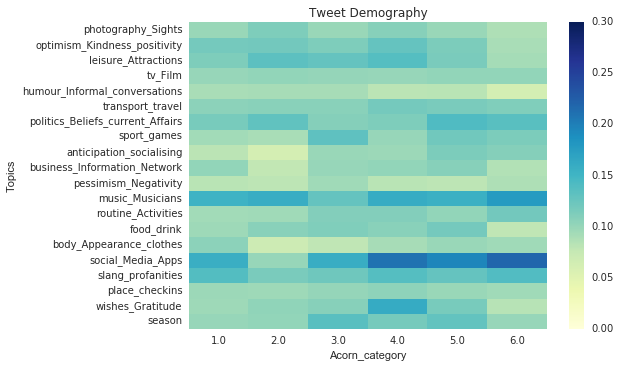

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
data =bycategory_df4
ax = sns.heatmap(data, yticklabels= row_tweets,  xticklabels= True, cmap="YlGnBu",  
                 vmin=0, vmax=0.3 )
#ax.invert_yaxis()
ax.set_title('Tweet Demography')
plt.show()

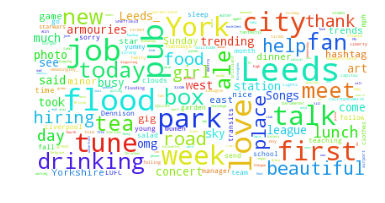

In [221]:
from os import path
from wordcloud import WordCloud
import sys

d = path.dirname('__file__')
# Read the whole text.
text = open(path.join(d, 'Topic_words.txt')).read()

# Generate a word cloud image
#wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.imshow(wordcloud)
#plt.axis("off")
 
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white", max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [222]:
placegeoa_df = tweetgeo_df.loc[(df['Latitude'].apply(lambda x: round(x,3) == 53.915)) & (df['Longitude'].apply(lambda y: round(y,3) == -1.815))] 

In [223]:
placegeoa_df = tweetgeo_df.loc[(tweetgeo_df.Latitude > 53.802712) & (tweetgeo_df.Latitude < 53.804740)  & (tweetgeo_df.Longitude > -1.542001) & (tweetgeo_df.Longitude < -1.541936)]


In [224]:
len(placegeoa_df)

1

In [225]:
placegeoa_df

,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,...,Created_at,Text,Year,Month,Day,Hour,Minute,Second,row_count,bow_tweets
4831,0.016667,0.016667,0.683333,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,"""Thu Dec 17 19:31:05 +0000 2015""","""At @fdarena to see the amazing @Dynamomagici...",2015,12,17,19,31,5,4831,"[see, amazing]"


In [226]:
placegeob_df = tweetgeo_df.loc[(tweetgeo_df.Latitude > 53.793904) & (tweetgeo_df.Latitude < 53.795438) &(tweetgeo_df.Longitude > -1.548438) & (tweetgeo_df.Longitude < -1.546764)]

In [227]:
len(placegeob_df)

656

In [228]:
byplacegeob_df = placegeob_df.groupby("Year").mean().reset_index()

In [229]:
byplacegeob_df

,Year,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,Id,UserId,Latitude,Longitude,Month,Day,Hour,Minute,Second,row_count
0,2015,0.27127,0.167011,0.127406,0.054278,0.067715,0.057745,0.144813,0.084555,0.046982,...,6.770690e+17,4.149790e+08,53.794533,-1.548171,12.000000,15.735632,14.471264,30.977011,28.712644,4102.563218
1,2016,0.27547,0.192952,0.130634,0.076042,0.051060,0.068159,0.085565,0.075620,0.056724,...,7.050404e+17,5.769008e+08,53.794534,-1.548078,2.527241,15.611599,14.061511,29.952548,29.356766,34450.152900


In [230]:
byplacegeoba_df=((byplacegeob_df + byplacegeob_df.shift(-1)) / 2)[::2]

In [231]:
placegeoc_df = tweetgeo_df.loc[(tweetgeo_df.Latitude > 53.796320) & (tweetgeo_df.Latitude < 53.796881)  & (tweetgeo_df.Longitude > -1.544184) & (tweetgeo_df.Longitude < -1.543454)]

In [232]:
len(placegeoc_df)

190

In [233]:
byplacegeoc_df = placegeoc_df.groupby("Year").mean().reset_index()

In [234]:
byplacegeoc_df

,Year,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,Id,UserId,Latitude,Longitude,Month,Day,Hour,Minute,Second,row_count
0,2015,0.090375,0.078121,0.058080,0.018974,0.011806,0.063254,0.069081,0.126444,0.073088,...,6.774242e+17,3.972998e+08,53.796544,-1.543820,12.00000,16.696970,15.090909,29.878788,27.939394,4590.545455
1,2016,0.091294,0.073789,0.054471,0.039484,0.039876,0.104130,0.084402,0.084903,0.032972,...,7.056433e+17,4.464969e+15,53.796532,-1.543792,2.55414,16.547771,15.515924,29.484076,30.866242,35131.949045


In [235]:
placegeod_df = tweetgeo_df.loc[(tweetgeo_df.Latitude > 53.776797) & (tweetgeo_df.Latitude < 53.778940)  & (tweetgeo_df.Longitude > -1.572769) & (tweetgeo_df.Longitude < -1.571707)]

In [236]:
byplacegeoca_df = ((byplacegeoc_df + byplacegeoc_df.shift(-1)) / 2)[::2]

In [237]:
len(placegeod_df)

108

In [238]:
byplacegeod_df = placegeod_df.groupby("Year").mean().reset_index()

In [239]:
byplacegeod_df

,Year,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,Id,UserId,Latitude,Longitude,Month,Day,Hour,Minute,Second,row_count
0,2015,0.041667,0.032692,0.116709,0.136972,0.041667,0.107812,0.059583,0.072482,0.095763,...,6.790556e+17,3.777728e+08,53.777760,-1.572133,12.000000,20.222222,14.500000,27.111111,27.111111,6309.444444
1,2016,0.070796,0.131652,0.115800,0.176378,0.100078,0.076553,0.116491,0.105210,0.030370,...,7.051222e+17,7.788889e+15,53.777614,-1.572213,2.488889,17.266667,15.922222,30.944444,26.022222,34474.211111


In [240]:
byplacegeoda_df=((byplacegeod_df + byplacegeod_df.shift(-1)) / 2)[::2]

In [241]:
byplacegeoda_df

,Year,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,Id,UserId,Latitude,Longitude,Month,Day,Hour,Minute,Second,row_count
0,2015.5,0.056232,0.082172,0.116255,0.156675,0.070872,0.092183,0.088037,0.088846,0.063067,...,6.920889e+17,3.894445e+15,53.777687,-1.572173,7.244444,18.744444,15.211111,29.027778,26.566667,20391.827778


In [242]:
placegeo_df = pd.concat([byplacegeoda_df,byplacegeoca_df,byplacegeoba_df,placegeoa_df])

In [243]:
placegeo_df 

,Created_at,Day,Hour,Id,Latitude,Longitude,Minute,Month,Place-full_name,Second,...,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,tweet_no,tweets
0,NaN,18.744444,15.211111,6.920889e+17,53.777687,-1.572173,29.027778,7.244444,NaN,26.566667,...,0.083122,0.086569,0.078090,0.288148,0.239954,0.090586,0.051343,0.069756,20391.827778,NaN
0,NaN,16.622370,15.303416,6.915338e+17,53.796538,-1.543806,29.681432,7.277070,NaN,29.402818,...,0.067617,0.172398,0.085231,0.019544,0.359880,0.138160,0.080197,0.056605,19861.247250,NaN
0,NaN,15.673616,14.266388,6.910547e+17,53.794533,-1.548124,30.464780,7.263620,NaN,29.034705,...,0.077154,0.033907,0.045020,0.044487,0.326155,0.060479,0.109340,0.062104,19276.358059,NaN
4831,"""Thu Dec 17 19:31:05 +0000 2015""",17.000000,19.000000,6.780000e+17,53.803583,-1.541938,31.000000,12.000000,"""Leeds_ England""",5.000000,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,4831.000000,"""At @fdarena to see the amazing @Dynamomagici..."


In [244]:
placegeo_df.columns

Index([u'Created_at', u'Day', u'Hour', u'Id', u'Latitude', u'Longitude',
       u'Minute', u'Month', u'Place-full_name', u'Second', u'Text',
       u'User-screen_name', u'UserId', u'Year', u'bow_tweets', u'row_count',
       u'topic0', u'topic1', u'topic10', u'topic11', u'topic12', u'topic13',
       u'topic14', u'topic15', u'topic16', u'topic17', u'topic18', u'topic19',
       u'topic2', u'topic3', u'topic4', u'topic5', u'topic6', u'topic7',
       u'topic8', u'topic9', u'tweet_no', u'tweets'],
      dtype='object')

In [245]:
placegeo_df1 = placegeo_df.drop([u'Created_at', u'Day', u'Hour', u'Id', u'Place-full_name', u'Longitude',
       u'Minute', u'Month', u'Second', u'Text',
       u'User-screen_name', u'UserId', u'Year', u'bow_tweets', u'row_count', u'tweet_no', u'tweets'], axis = 1)

In [246]:
placegeo_df1 

,Latitude,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,...,topic18,topic19,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,53.777687,0.056232,0.082172,0.116255,0.156675,0.070872,0.092183,0.088037,0.088846,0.063067,...,0.118275,0.121589,0.083122,0.086569,0.078090,0.288148,0.239954,0.090586,0.051343,0.069756
0,53.796538,0.090834,0.075955,0.056275,0.029229,0.025841,0.083692,0.076742,0.105674,0.053030,...,0.035830,0.160757,0.067617,0.172398,0.085231,0.019544,0.359880,0.138160,0.080197,0.056605
0,53.794533,0.273370,0.179981,0.129020,0.065160,0.059388,0.062952,0.115189,0.080088,0.051853,...,0.087339,0.174415,0.077154,0.033907,0.045020,0.044487,0.326155,0.060479,0.109340,0.062104
4831,53.803583,0.016667,0.016667,0.683333,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667


In [247]:
placegeo_df2 = placegeo_df1.set_index("Latitude")

In [248]:
placegeo_df2

,topic0,topic1,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
Latitude,,,,,,,,,,,,,,,,,,,,
53.777687,0.056232,0.082172,0.116255,0.156675,0.070872,0.092183,0.088037,0.088846,0.063067,0.126159,0.118275,0.121589,0.083122,0.086569,0.078090,0.288148,0.239954,0.090586,0.051343,0.069756
53.796538,0.090834,0.075955,0.056275,0.029229,0.025841,0.083692,0.076742,0.105674,0.053030,0.040048,0.035830,0.160757,0.067617,0.172398,0.085231,0.019544,0.359880,0.138160,0.080197,0.056605
53.794533,0.273370,0.179981,0.129020,0.065160,0.059388,0.062952,0.115189,0.080088,0.051853,0.097070,0.087339,0.174415,0.077154,0.033907,0.045020,0.044487,0.326155,0.060479,0.109340,0.062104
53.803583,0.016667,0.016667,0.683333,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667


In [249]:
placegeo_df3= placegeo_df2.transpose()
placegeo_df3.index.name = 'Topics'
placegeo_df3

Latitude,53.7776866856,53.7965378886,53.7945332515,53.80358306
Topics,,,,
topic0,0.056232,0.090834,0.273370,0.016667
topic1,0.082172,0.075955,0.179981,0.016667
topic10,0.116255,0.056275,0.129020,0.683333
topic11,0.156675,0.029229,0.065160,0.016667
topic12,0.070872,0.025841,0.059388,0.016667
topic13,0.092183,0.083692,0.062952,0.016667
topic14,0.088037,0.076742,0.115189,0.016667
topic15,0.088846,0.105674,0.080088,0.016667
topic16,0.063067,0.053030,0.051853,0.016667


In [250]:
placegeo_df3.columns.name = "place names"

In [251]:
row_tweets = ["photography_Sights","optimism_Kindness_positivity","leisure_Attractions","tv_Film",
              "humour_Informal_conversations","transport_travel","politics_Beliefs_current_Affairs", 
              "sport_games", "anticipation_socialising","business_Information_Network", "pessimism_Negativity", 
              "music_Musicians", "routine_Activities", "food_drink","body_Appearance_clothes","social_Media_Apps",
              "slang_profanities","place_checkins", "wishes_Gratitude", "season"]

In [252]:
column_placenames= ["Arena", "Station", "Mall", "Stadium"]

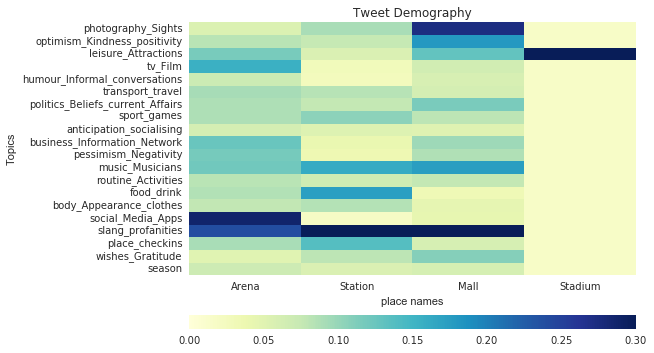

In [253]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
data =placegeo_df3

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(data, yticklabels= row_tweets, cmap="YlGnBu", xticklabels= column_placenames, ax=ax, cbar_ax=cbar_ax, 
                 cbar_kws={"orientation": "horizontal"}, vmin=0, vmax=0.3 )
ax.set_title('Tweet Demography')
plt.show()